In [ ]:
!pip install scipy

In [ ]:
!pip install xgboost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 23.8 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import ParameterSampler, train_test_split, GridSearchCV,StratifiedKFold
from scipy.stats import uniform, randint
from tqdm.auto import tqdm
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostClassifier
import torch
import torch.nn as nn
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc,
    precision_score, recall_score, f1_score, classification_report
)
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from tqdm.auto import tqdm

In [ ]:
# Download data from kaggle
api_token = {"username":"choujiahsuan","key":"kaggle_api"}
if not os.path.exists("/root/.kaggle"):
    os.makedirs("/root/.kaggle")

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

if not os.path.exists("/kaggle"):
    os.makedirs("/kaggle")
os.chdir('/kaggle')

!kaggle competitions download -c multivariate-analysis-2025-1-final-project --force
!ls /kaggle

  0% 0.00/840k [00:00<?, ?B/s]
100% 840k/840k [00:00<00:00, 1.21GB/s]
input  multivariate-analysis-2025-1-final-project.zip


In [ ]:
!unzip \*.zip

Archive:  multivariate-analysis-2025-1-final-project.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
df.head()

,ID,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Label
0,46547,1,0.0,1,28.0,0.0,0.0,0.0,1,0,...,0.0,3.0,4.0,2.0,0.0,1,8,4.0,11.0,0.0
1,22889,0,1.0,1,30.0,1.0,0.0,0.0,1,1,...,0.0,2.0,4.0,0.0,0.0,1,4,6.0,9.0,0.0
2,31776,0,0.0,1,30.0,0.0,0.0,0.0,1,0,...,0.0,4.0,0.0,0.0,1.0,1,4,6.0,7.0,0.0
3,56523,1,0.0,1,31.0,1.0,0.0,0.0,1,1,...,0.0,2.0,0.0,2.0,0.0,0,12,5.0,8.0,0.0
4,55339,0,0.0,1,27.0,0.0,0.0,0.0,1,1,...,1.0,3.0,0.0,0.0,0.0,0,10,5.0,5.0,0.0


In [ ]:
df.tail()

,ID,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Label
47270,4352,0,0.0,1,31.0,0.0,0.0,0.0,1,1,...,0.0,1.0,0.0,0.0,0.0,1,5,4.0,10.0,0.0
47271,24379,0,0.0,1,27.0,0.0,0.0,0.0,1,0,...,0.0,3.0,6.0,0.0,0.0,0,11,5.0,5.0,0.0
47272,35503,0,0.0,0,30.0,1.0,0.0,0.0,1,0,...,0.0,2.0,0.0,0.0,0.0,1,7,4.0,8.0,0.0
47273,15152,0,1.0,1,24.0,1.0,0.0,0.0,1,0,...,0.0,2.0,0.0,0.0,1.0,1,11,5.0,7.0,0.0
47274,14949,0,0.0,1,34.0,1.0,0.0,0.0,0,1,...,0.0,2.0,30.0,0.0,1.0,0,10,5.0,4.0,0.0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47275 entries, 0 to 47274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    47275 non-null  int64  
 1   HighBP                47275 non-null  int64  
 2   HighChol              47275 non-null  float64
 3   CholCheck             47275 non-null  int64  
 4   BMI                   47275 non-null  float64
 5   Smoker                47275 non-null  float64
 6   Stroke                47275 non-null  float64
 7   HeartDiseaseorAttack  47275 non-null  float64
 8   PhysActivity          47275 non-null  int64  
 9   Fruits                47275 non-null  int64  
 10  Veggies               47275 non-null  int64  
 11  HvyAlcoholConsump     47275 non-null  int64  
 12  AnyHealthcare         47275 non-null  int64  
 13  NoDocbcCost           47275 non-null  float64
 14  GenHlth               47275 non-null  float64
 15  MentHlth           

## 1. All data EDA

* 數值型資料：hist/boxplot/Violin Plot
 * "BMI", "Age", "Income", "MentHlth", "PhysHlth","GenHlth",  
* 類別型資料：bar plot
 * HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, Sex,Education,DiffWalk                     

In [ ]:
num_cols = [
    "BMI", "Age","Income", "MentHlth", "PhysHlth", "GenHlth"
    ]

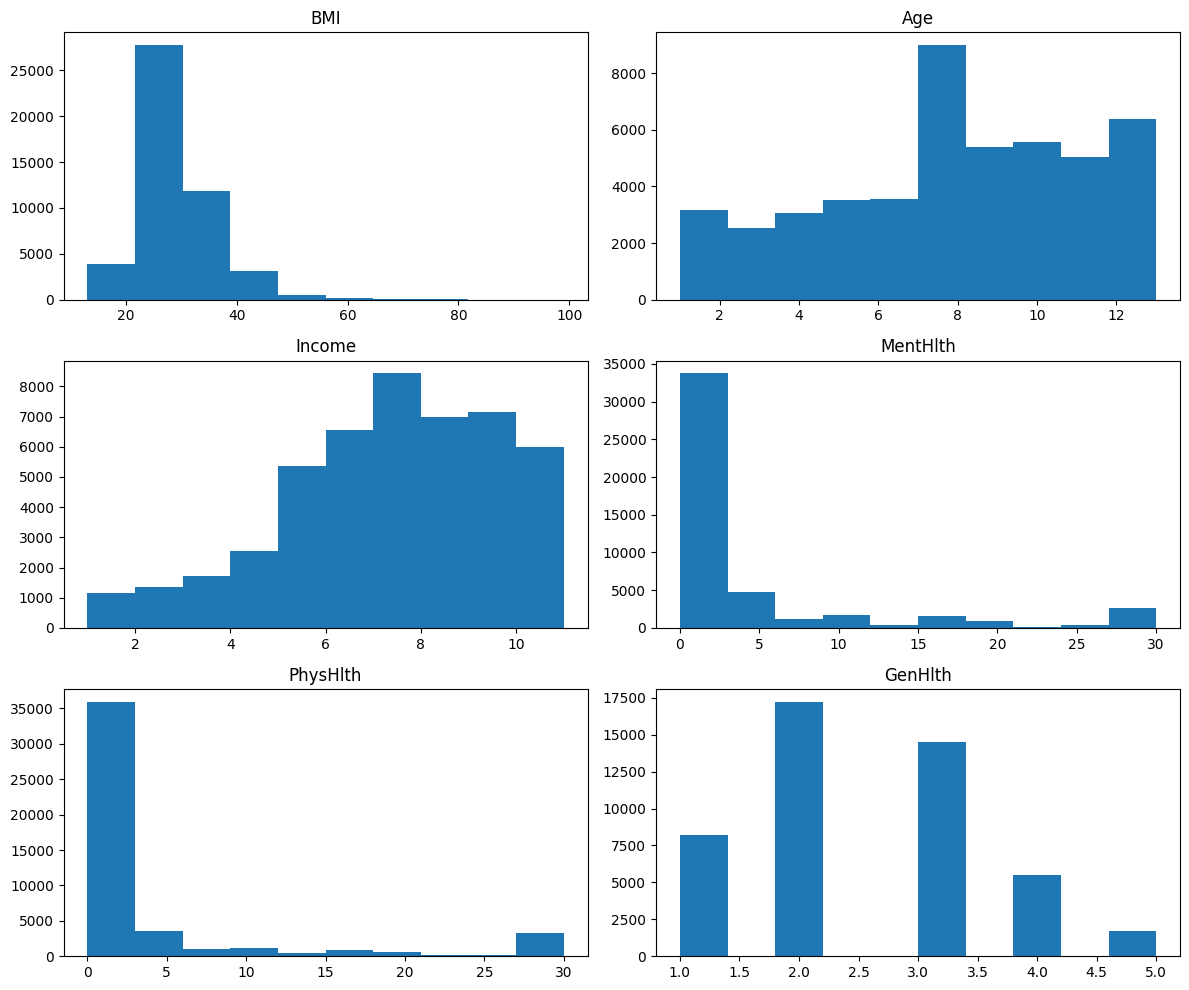

In [ ]:
df[num_cols].hist(bins=10, figsize=(12, 10), grid=False)
plt.tight_layout()
plt.show()

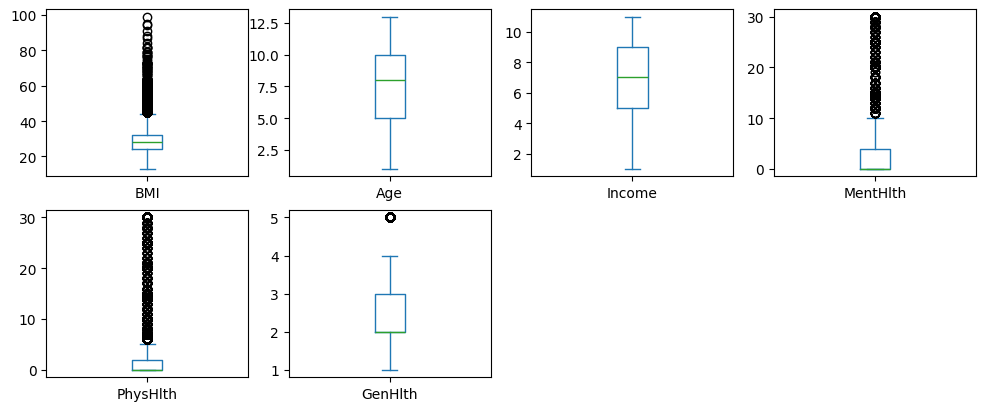

In [ ]:
# 2. Boxplot（單圖，多變數）
df[num_cols].plot(kind="box", subplots=True, layout=(4,4), sharex=False, figsize=(12, 10))
plt.show()

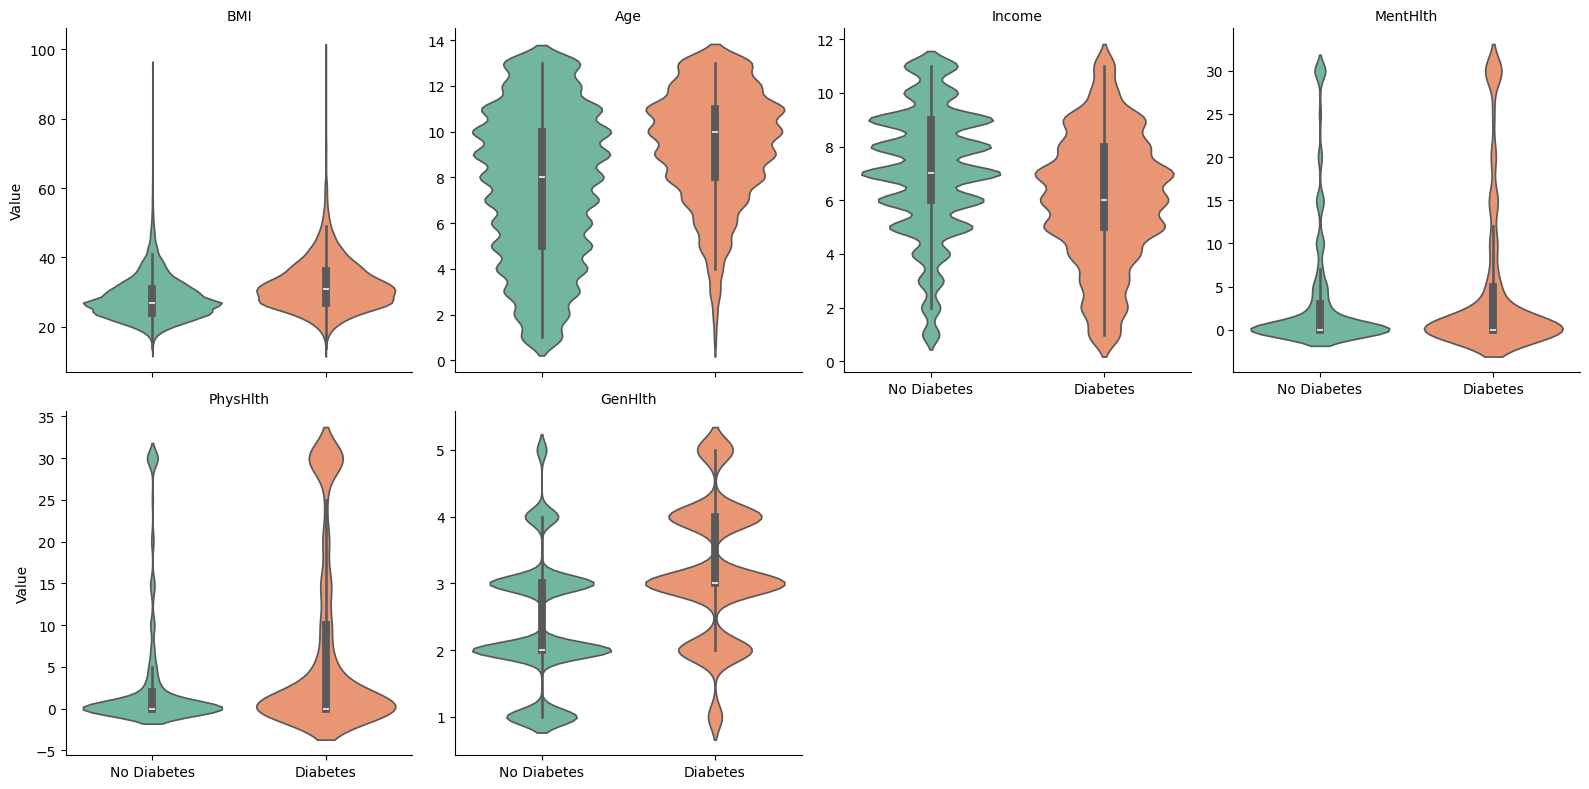

In [ ]:
# 3. Volin plot(多圖)
df_melt = df.melt(id_vars='Label', value_vars=num_cols,
                  var_name='Feature', value_name='Value')
g = sns.FacetGrid(df_melt, col="Feature", col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.violinplot, x="Label", y="Value", hue="Label", palette="Set2", legend=False)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("", "Value")

for ax in g.axes:
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No Diabetes", "Diabetes"])

plt.tight_layout()
plt.show()


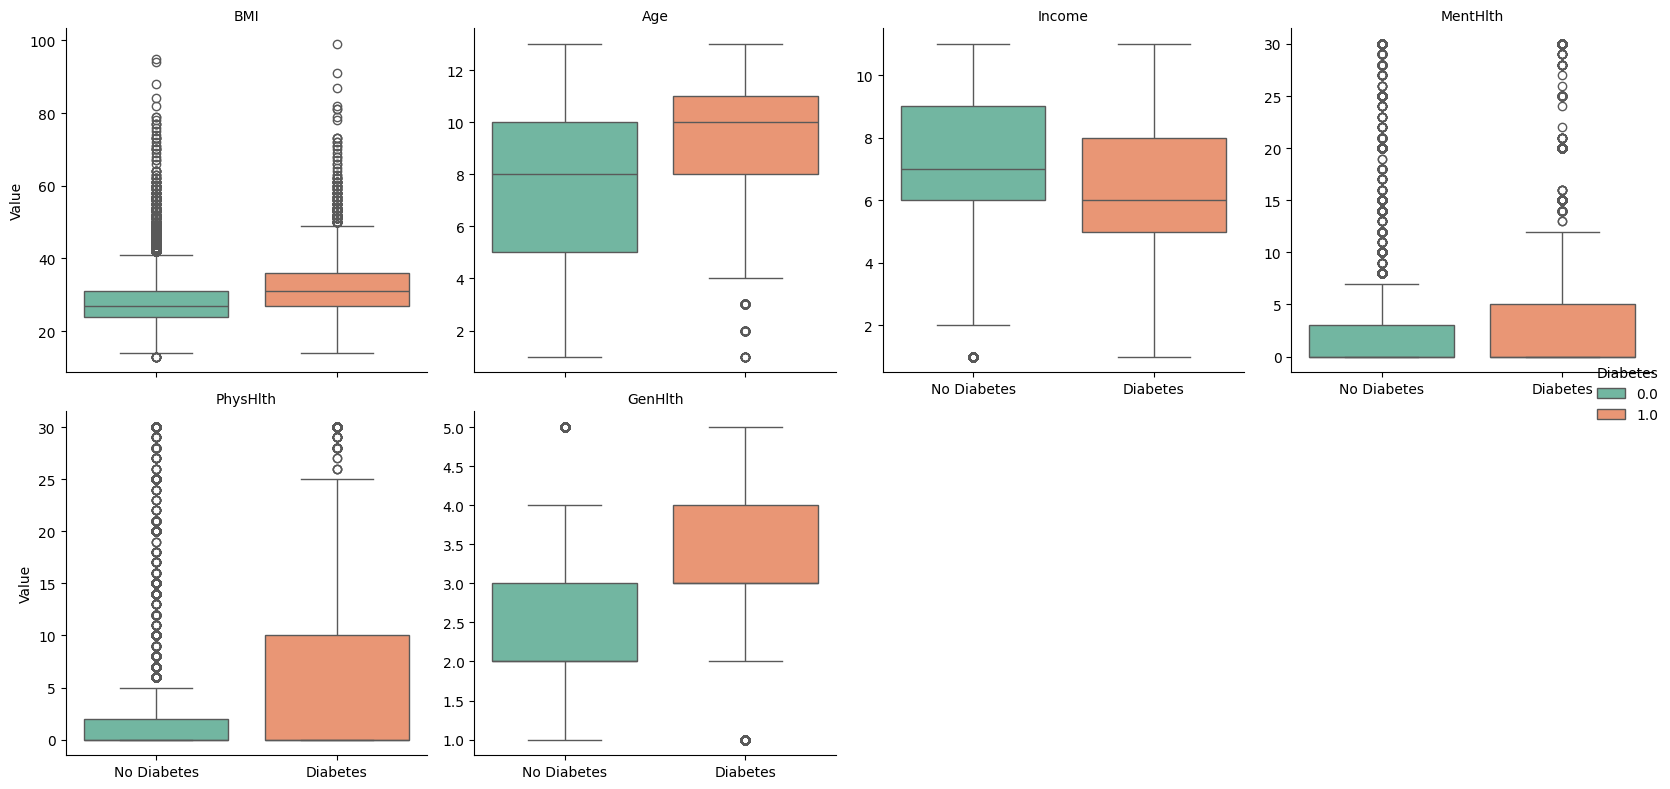

In [ ]:
g = sns.FacetGrid(df_melt, col="Feature", col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.boxplot, x="Label", y="Value", hue="Label", palette="Set2", dodge=False)

for ax in g.axes.flat:
    if ax.get_legend() is not None:
        ax.get_legend().remove()

g.add_legend(title="Diabetes")

g.set_titles("{col_name}")
g.set_axis_labels("", "Value")
for ax in g.axes:
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No Diabetes", "Diabetes"])

plt.tight_layout()
plt.show()

In [ ]:
cato_cols = ["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack"
, "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost"
, "Sex", "Education", "DiffWalk"]

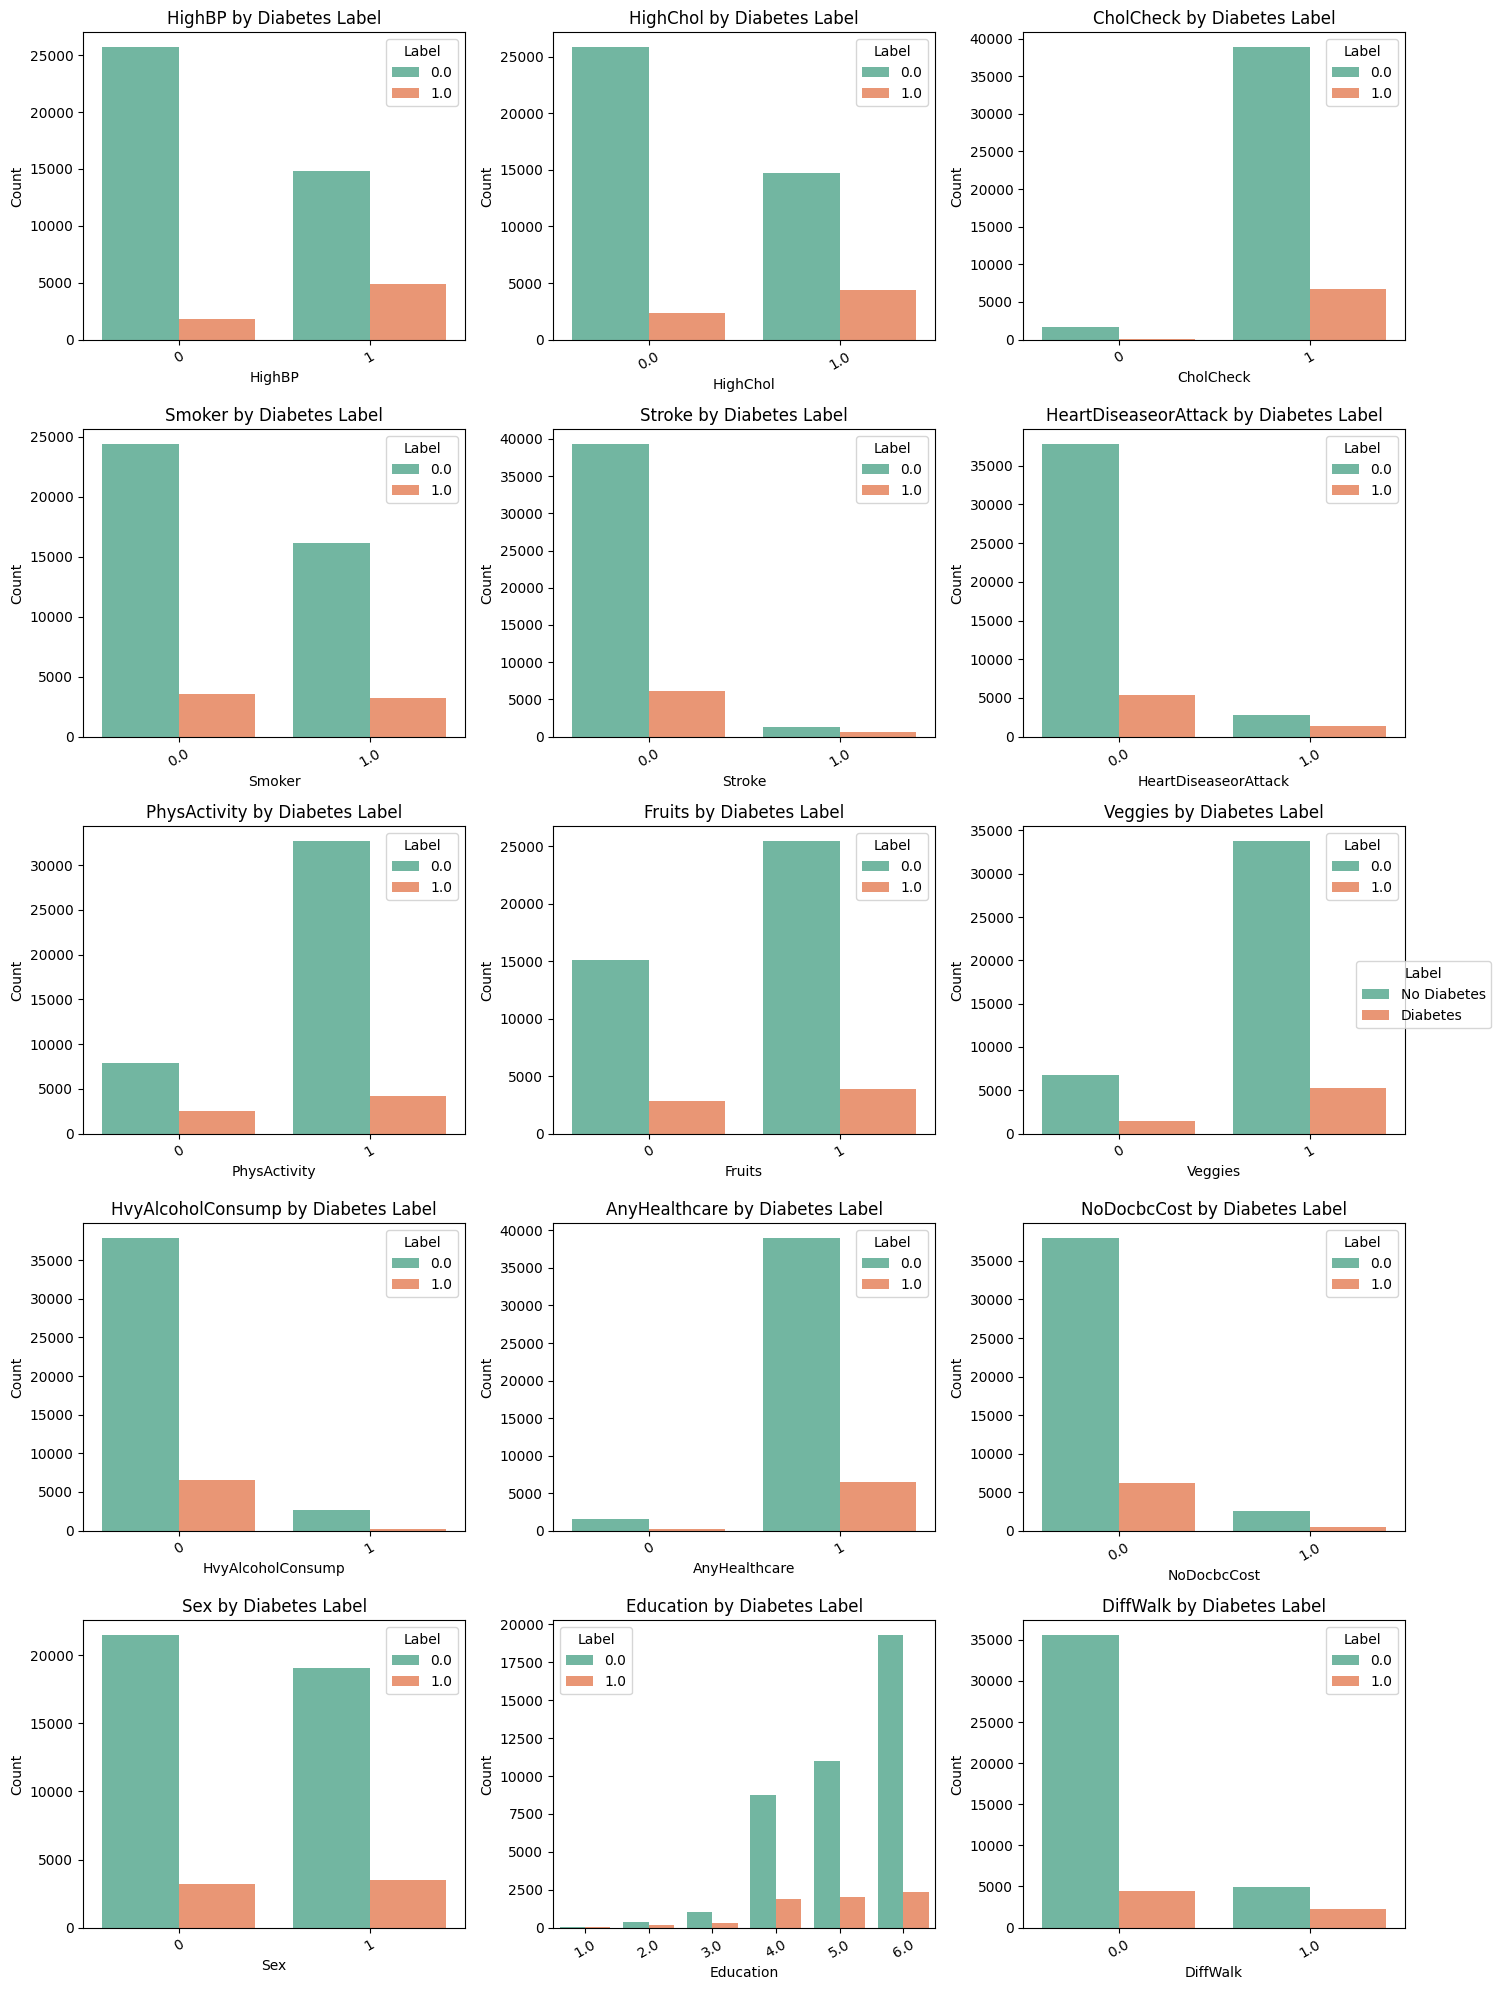

In [ ]:
n_cols = 3
n_rows = (len(cato_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cato_cols):
    sns.countplot(data=df, x=col, hue="Label", palette="Set2", ax=axes[i])
    axes[i].set_title(f"{col} by Diabetes Label")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ["No Diabetes", "Diabetes"], title="Label", loc='center right')

plt.tight_layout(rect=[0, 0, 0.95, 1])  
plt.show()

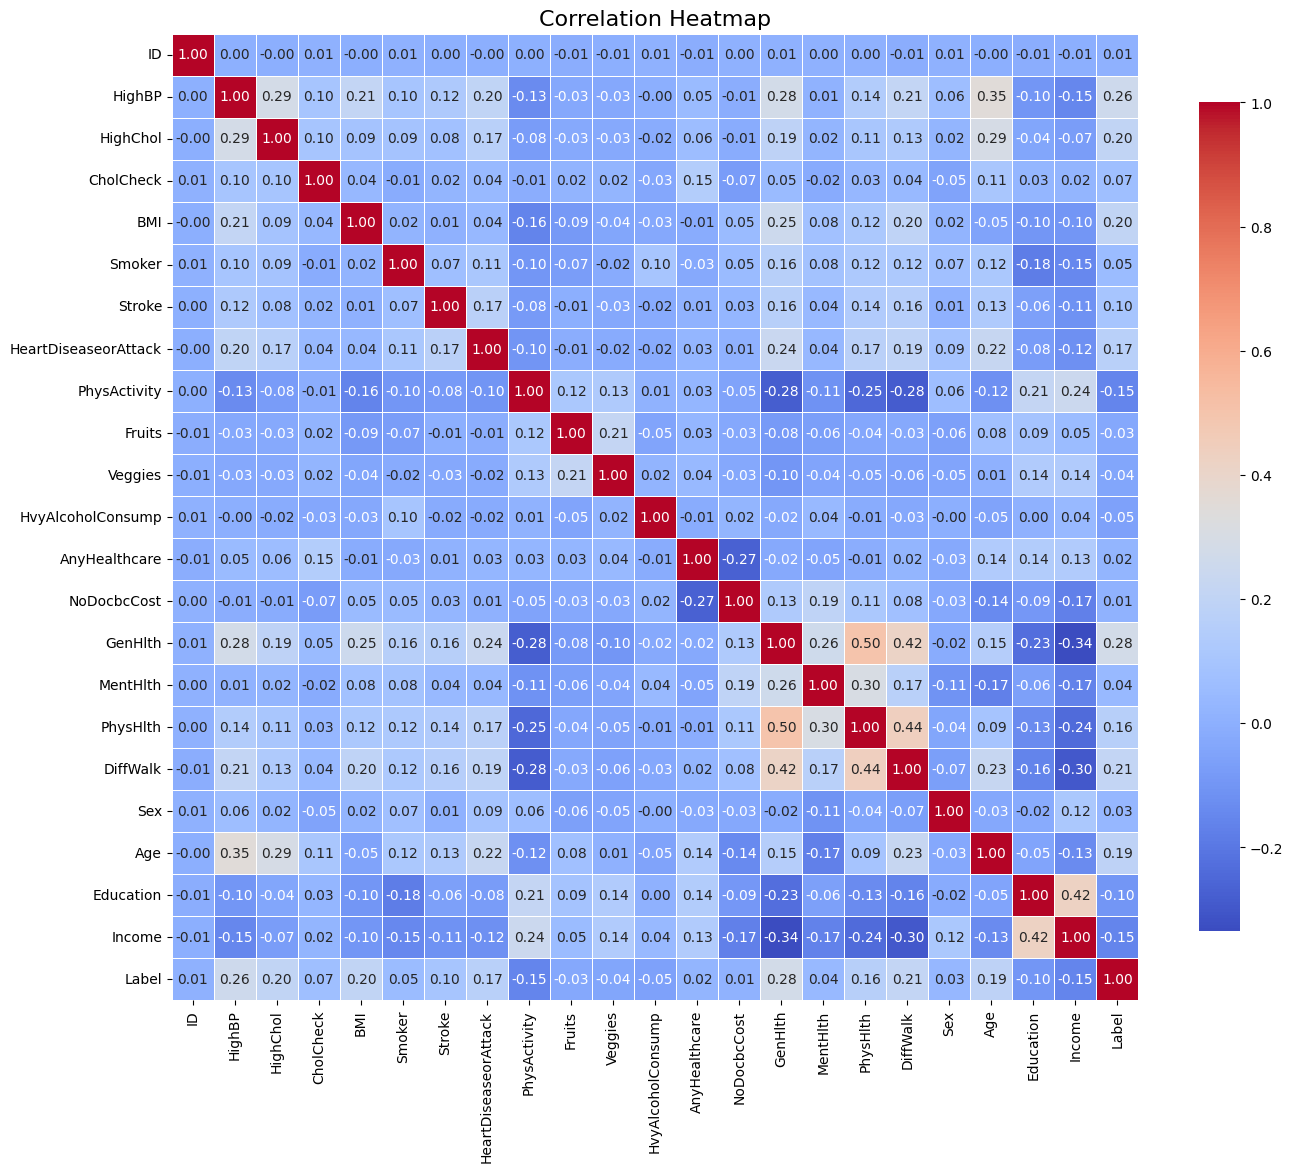

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

## Subsample EDA

In [ ]:
num_cols = [
    "BMI", "Age","Income", "MentHlth", "PhysHlth", "GenHlth"
    ]

In [ ]:
# Subsample
df_diab = df[df['Label'] == 1]
df_no_diab = df[df['Label'] == 0].sample(n=len(df_diab), random_state=seed)

df_sub = pd.concat([df_diab, df_no_diab]).sample(frac=1, random_state=seed)

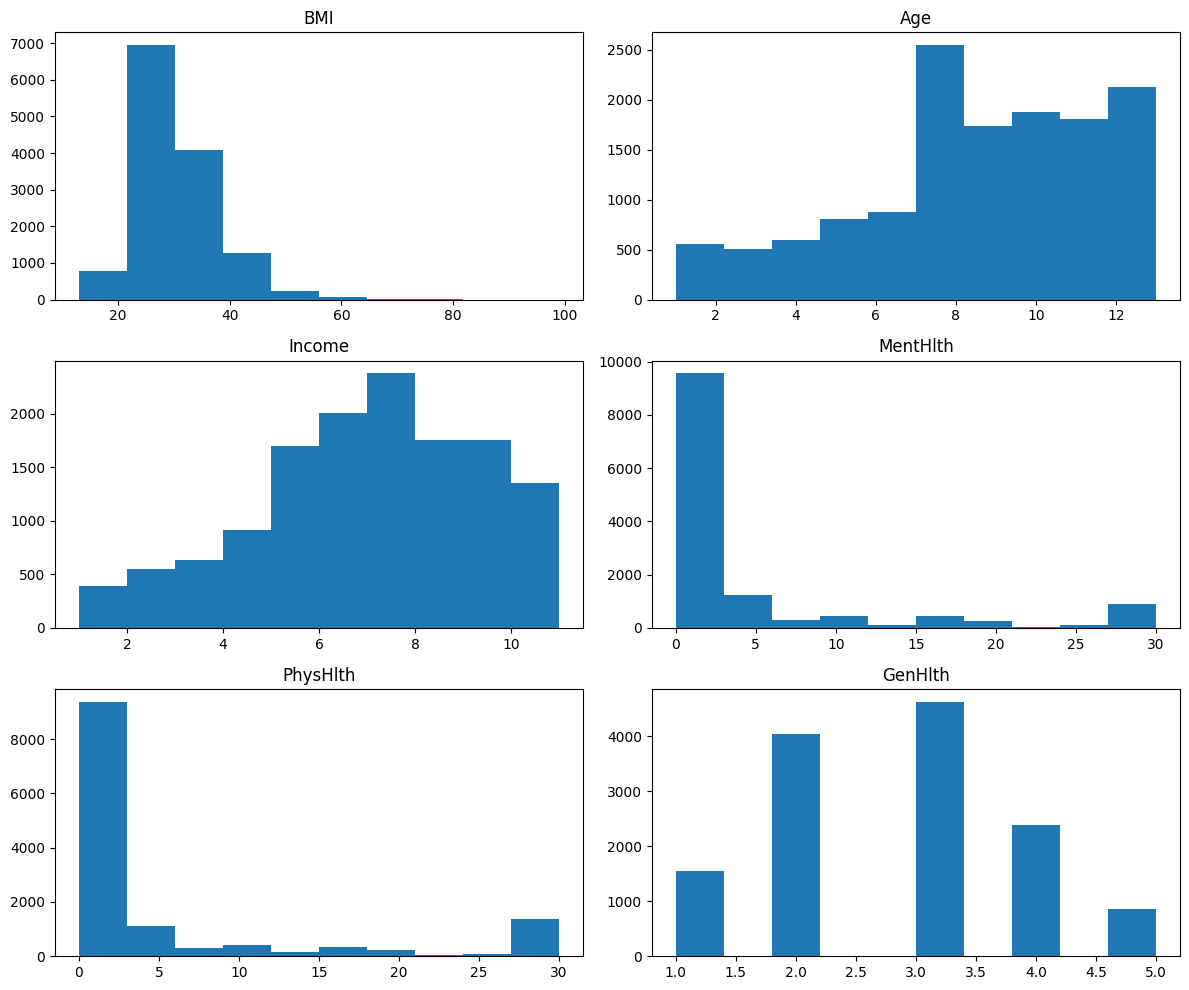

In [ ]:
df_sub[num_cols].hist(bins=10, figsize=(12, 10), grid=False)
plt.tight_layout()
plt.show()

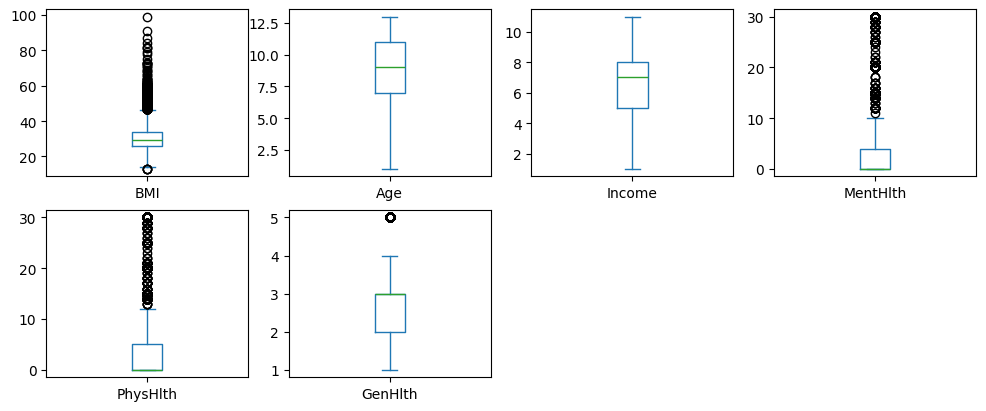

In [ ]:
# 2. Boxplot（單圖，多變數）
df_sub[num_cols].plot(kind="box", subplots=True, layout=(4,4), sharex=False, figsize=(12, 10))
plt.show()

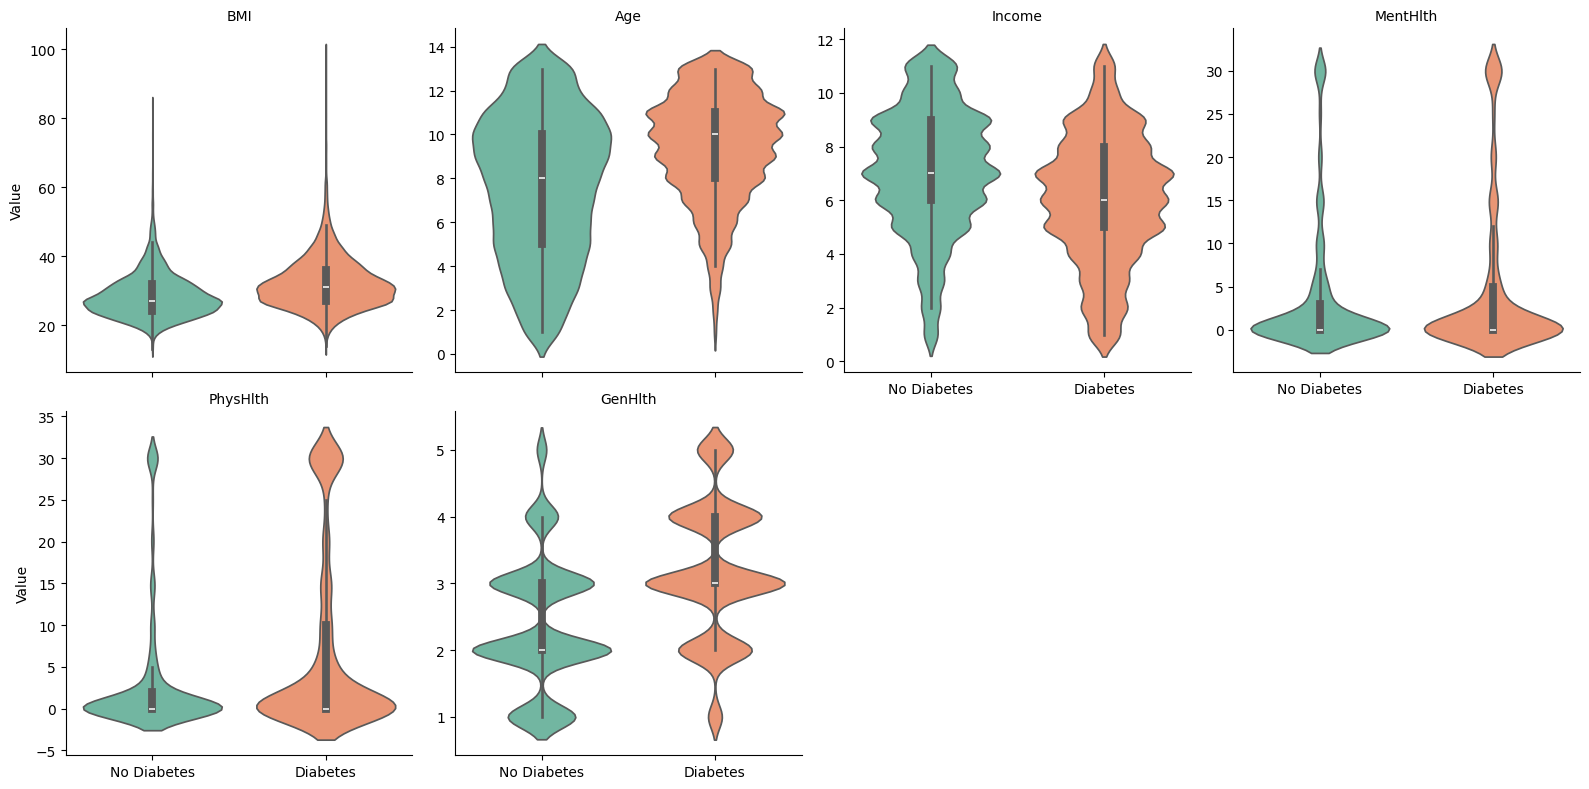

In [ ]:
# 3. Volin plot(多圖)
df_melt = df_sub.melt(id_vars='Label', value_vars=num_cols,
                  var_name='Feature', value_name='Value')

g = sns.FacetGrid(df_melt, col="Feature", col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.violinplot, x="Label", y="Value", hue="Label", palette="Set2", legend=False)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("", "Value")

for ax in g.axes:
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No Diabetes", "Diabetes"])

plt.tight_layout()
plt.show()


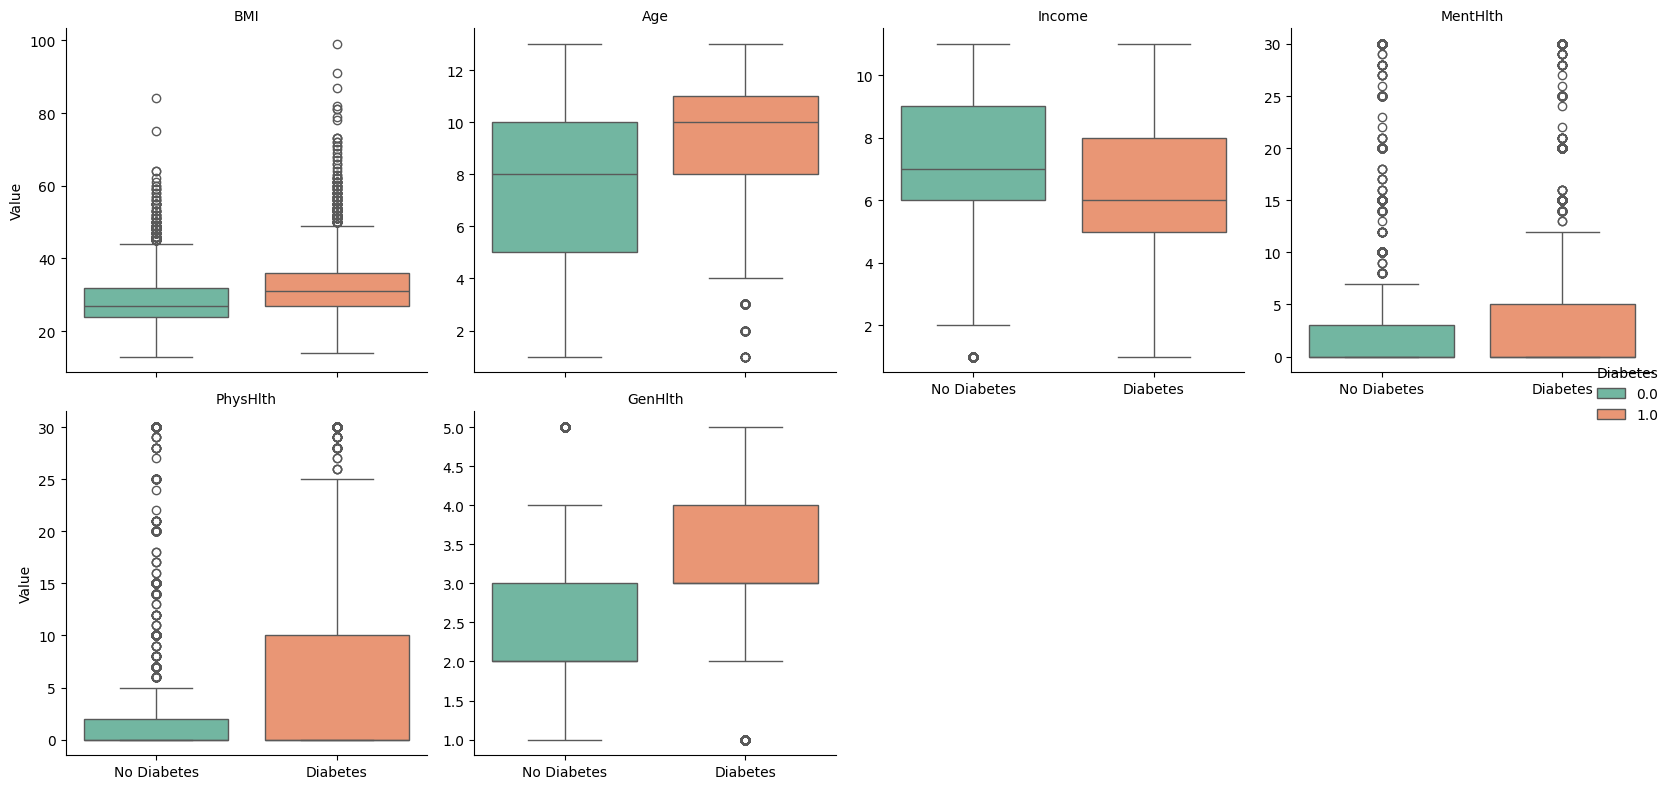

In [ ]:
g = sns.FacetGrid(df_melt, col="Feature", col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.boxplot, x="Label", y="Value", hue="Label", palette="Set2", dodge=False)

for ax in g.axes.flat:
    if ax.get_legend() is not None:
        ax.get_legend().remove()

g.add_legend(title="Diabetes")

g.set_titles("{col_name}")
g.set_axis_labels("", "Value")
for ax in g.axes:
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No Diabetes", "Diabetes"])

plt.tight_layout()
plt.show()

In [ ]:
cato_cols = ["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack"
, "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost"
, "Sex", "Education", "DiffWalk"]

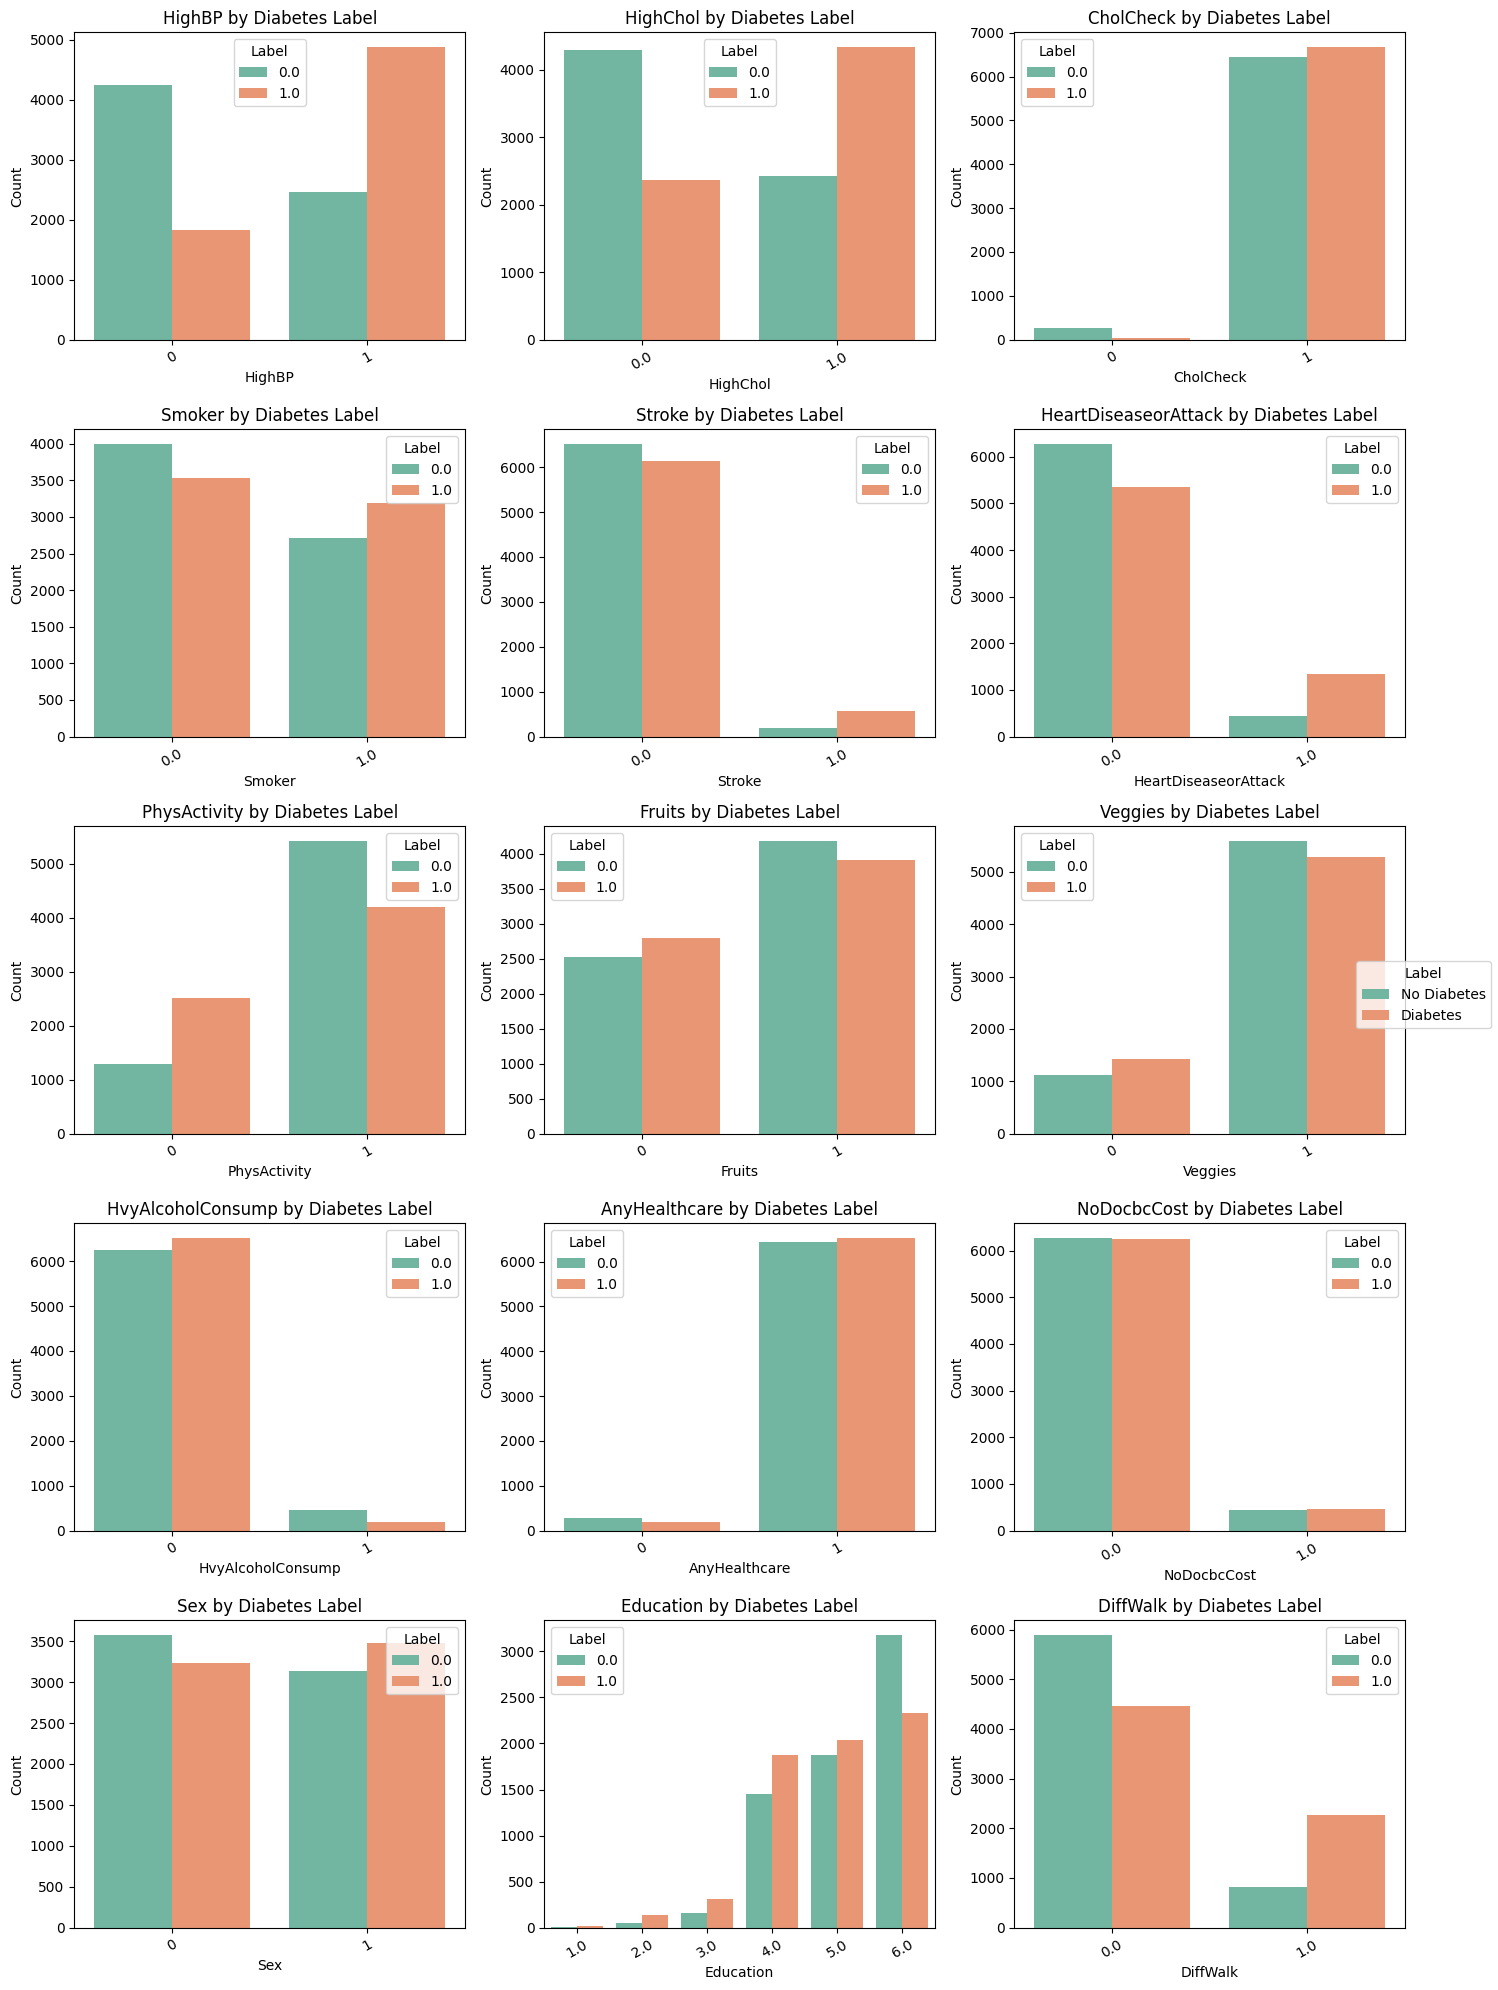

In [ ]:
n_cols = 3
n_rows = (len(cato_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cato_cols):
    sns.countplot(data=df_sub, x=col, hue="Label", palette="Set2", ax=axes[i])
    axes[i].set_title(f"{col} by Diabetes Label")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ["No Diabetes", "Diabetes"], title="Label", loc='center right')

plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()

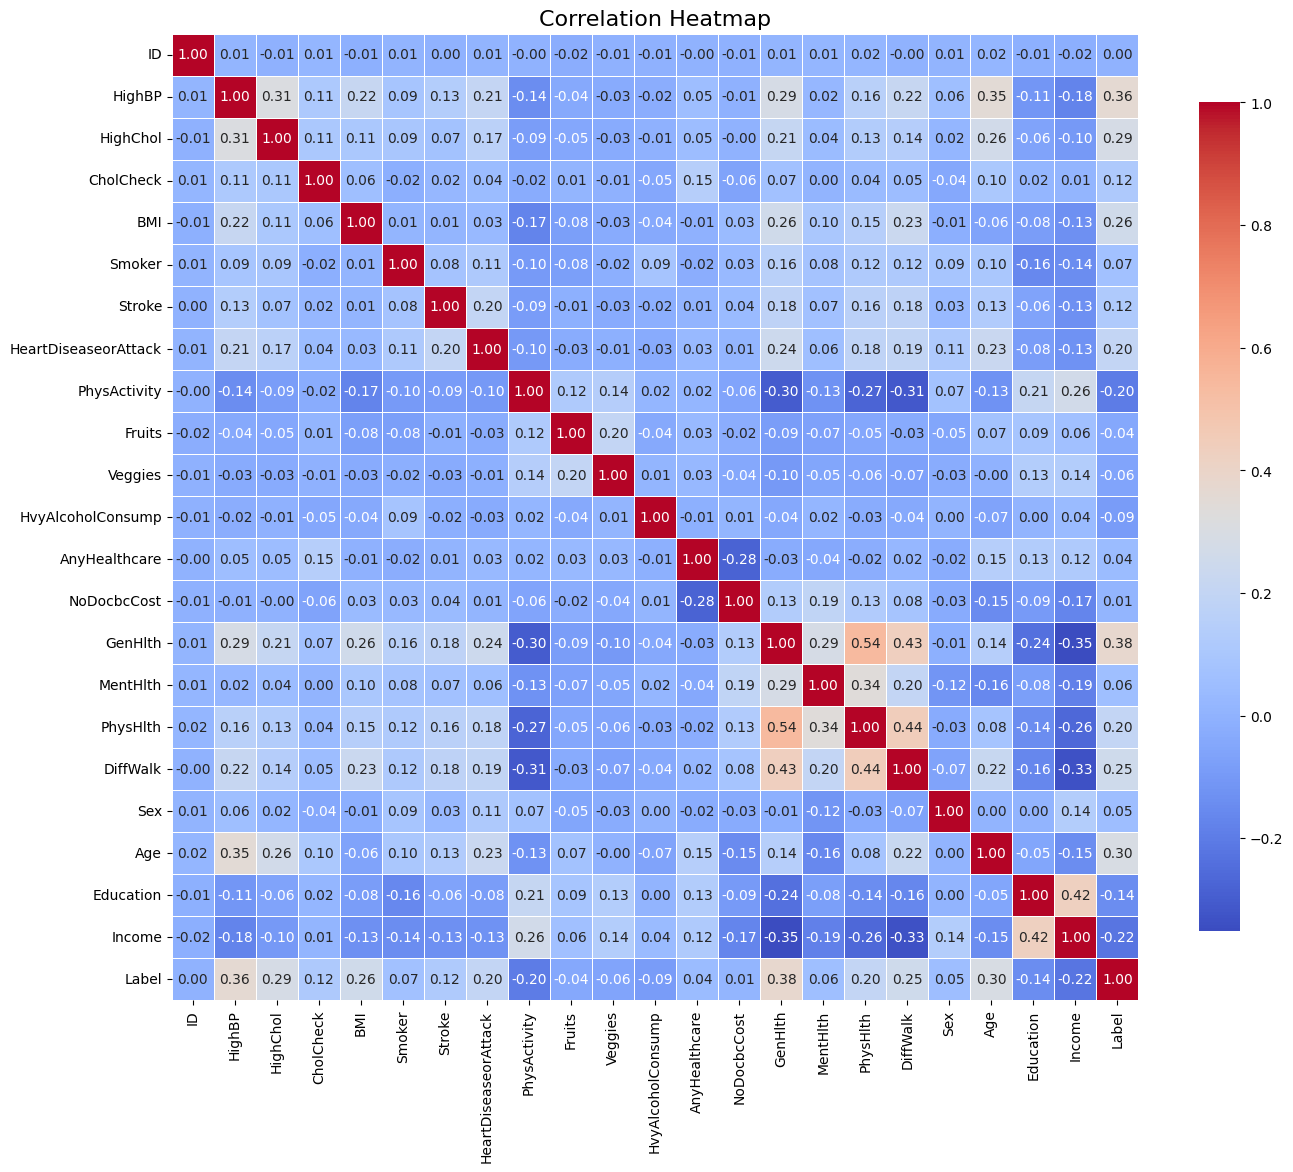

In [ ]:
corr_matrix = df_sub.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
seed = 2024

df = pd.read_csv('train.csv')
df_x = df.iloc[:, 1:22]
df_y = df.iloc[:, 22]
x = df_x.values
y = df_y.values

## Smote/Random Forest

In [ ]:
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15, 20, 30, 50, None],
    "min_samples_split": [2, 3, 4, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
    "max_leaf_nodes": list(range(2, 100))
}
n_iter = 50

param_list = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=seed))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

best_score = 0
best_params = None
best_thresh = None

print("🔍 Running Random Search with 3-Fold CV and Threshold Tuning...")

for i, param in enumerate(tqdm(param_list)):
    y_proba_all = np.zeros_like(y, dtype=float)

    for train_idx, val_idx in cv.split(x, y):
        x_train_fold, y_train_fold = x[train_idx], y[train_idx]
        x_val_fold, y_val_fold = x[val_idx], y[val_idx]

        smote = SMOTE(random_state=seed)
        x_train_resampled, y_train_resampled = smote.fit_resample(x_train_fold, y_train_fold)

        clf = RandomForestClassifier(**param, random_state=seed, n_jobs=-1)
        clf.fit(x_train_resampled, y_train_resampled)

        y_proba_all[val_idx] = clf.predict_proba(x_val_fold)[:, 1]

    # threshold = 0.3
    fixed_threshold = 0.3
    y_pred_all = (y_proba_all >= fixed_threshold).astype(int)
    score = f1_score(y, y_pred_all, average='macro')

    if score > best_score:
        best_score = score
        best_params = param
        best_thresh = fixed_threshold

    print(f"Iter {i+1:02d} | Macro F1 = {score:.4f}")

print("\n✅ Best Result with SMOTE and manual CV:")
print("Params:", best_params)
print(f"Threshold: {best_thresh}, Macro F1: {best_score:.4f}")


🔍 Running Random Search with 3-Fold CV and Threshold Tuning...


  2%|▏         | 1/50 [00:21<17:37, 21.59s/it]

Iter 01 | Macro F1 = 0.5585


  4%|▍         | 2/50 [03:01<1:22:29, 103.11s/it]

Iter 02 | Macro F1 = 0.6456


  6%|▌         | 3/50 [04:44<1:20:43, 103.05s/it]

Iter 03 | Macro F1 = 0.6425


  8%|▊         | 4/50 [06:17<1:15:44, 98.80s/it] 

Iter 04 | Macro F1 = 0.5623


 10%|█         | 5/50 [06:31<51:10, 68.22s/it]  

Iter 05 | Macro F1 = 0.6229


 12%|█▏        | 6/50 [07:08<42:24, 57.82s/it]

Iter 06 | Macro F1 = 0.6045


 14%|█▍        | 7/50 [07:52<38:07, 53.20s/it]

Iter 07 | Macro F1 = 0.6116


 16%|█▌        | 8/50 [08:03<27:47, 39.71s/it]

Iter 08 | Macro F1 = 0.5563


 18%|█▊        | 9/50 [08:17<21:37, 31.64s/it]

Iter 09 | Macro F1 = 0.6263


 20%|██        | 10/50 [08:35<18:25, 27.65s/it]

Iter 10 | Macro F1 = 0.5368


 22%|██▏       | 11/50 [08:55<16:21, 25.16s/it]

Iter 11 | Macro F1 = 0.5439


 24%|██▍       | 12/50 [11:23<39:43, 62.72s/it]

Iter 12 | Macro F1 = 0.6393


 26%|██▌       | 13/50 [13:58<55:55, 90.69s/it]

Iter 13 | Macro F1 = 0.6417


 28%|██▊       | 14/50 [14:09<39:49, 66.37s/it]

Iter 14 | Macro F1 = 0.5335


 30%|███       | 15/50 [16:06<47:39, 81.70s/it]

Iter 15 | Macro F1 = 0.5934


 32%|███▏      | 16/50 [17:24<45:46, 80.77s/it]

Iter 16 | Macro F1 = 0.5933


 34%|███▍      | 17/50 [17:36<33:02, 60.09s/it]

Iter 17 | Macro F1 = 0.5868


 36%|███▌      | 18/50 [18:00<26:08, 49.01s/it]

Iter 18 | Macro F1 = 0.5816


 38%|███▊      | 19/50 [18:11<19:28, 37.69s/it]

Iter 19 | Macro F1 = 0.1994


 40%|████      | 20/50 [19:03<21:01, 42.05s/it]

Iter 20 | Macro F1 = 0.6409


 42%|████▏     | 21/50 [19:43<20:02, 41.46s/it]

Iter 21 | Macro F1 = 0.6180


 44%|████▍     | 22/50 [20:20<18:42, 40.11s/it]

Iter 22 | Macro F1 = 0.6014


 46%|████▌     | 23/50 [20:52<16:52, 37.50s/it]

Iter 23 | Macro F1 = 0.5614


 48%|████▊     | 24/50 [21:13<14:10, 32.71s/it]

Iter 24 | Macro F1 = 0.5585


 50%|█████     | 25/50 [21:43<13:16, 31.85s/it]

Iter 25 | Macro F1 = 0.5598


 52%|█████▏    | 26/50 [21:55<10:20, 25.84s/it]

Iter 26 | Macro F1 = 0.5787


 54%|█████▍    | 27/50 [22:03<07:53, 20.60s/it]

Iter 27 | Macro F1 = 0.5075


 56%|█████▌    | 28/50 [22:55<10:57, 29.90s/it]

Iter 28 | Macro F1 = 0.6430


 58%|█████▊    | 29/50 [24:02<14:25, 41.21s/it]

Iter 29 | Macro F1 = 0.5623


 60%|██████    | 30/50 [26:39<25:13, 75.69s/it]

Iter 30 | Macro F1 = 0.6428


 62%|██████▏   | 31/50 [29:18<31:57, 100.94s/it]

Iter 31 | Macro F1 = 0.6446


 64%|██████▍   | 32/50 [29:29<22:10, 73.91s/it] 

Iter 32 | Macro F1 = 0.5562


 66%|██████▌   | 33/50 [29:38<15:23, 54.35s/it]

Iter 33 | Macro F1 = 0.5075


 68%|██████▊   | 34/50 [30:57<16:25, 61.61s/it]

Iter 34 | Macro F1 = 0.5933


 70%|███████   | 35/50 [31:36<13:46, 55.09s/it]

Iter 35 | Macro F1 = 0.6052


 72%|███████▏  | 36/50 [31:50<09:57, 42.71s/it]

Iter 36 | Macro F1 = 0.6170


 74%|███████▍  | 37/50 [32:28<08:54, 41.12s/it]

Iter 37 | Macro F1 = 0.5947


 76%|███████▌  | 38/50 [33:18<08:47, 43.99s/it]

Iter 38 | Macro F1 = 0.6264


 78%|███████▊  | 39/50 [33:45<07:06, 38.77s/it]

Iter 39 | Macro F1 = 0.6105


 80%|████████  | 40/50 [33:56<05:04, 30.43s/it]

Iter 40 | Macro F1 = 0.5562


 82%|████████▏ | 41/50 [34:23<04:24, 29.44s/it]

Iter 41 | Macro F1 = 0.6211


 84%|████████▍ | 42/50 [34:44<03:34, 26.79s/it]

Iter 42 | Macro F1 = 0.5683


 86%|████████▌ | 43/50 [35:23<03:33, 30.53s/it]

Iter 43 | Macro F1 = 0.6100


 88%|████████▊ | 44/50 [35:34<02:27, 24.64s/it]

Iter 44 | Macro F1 = 0.5561


 90%|█████████ | 45/50 [36:08<02:16, 27.40s/it]

Iter 45 | Macro F1 = 0.5735


 92%|█████████▏| 46/50 [36:36<01:50, 27.58s/it]

Iter 46 | Macro F1 = 0.6257


 94%|█████████▍| 47/50 [37:16<01:34, 31.42s/it]

Iter 47 | Macro F1 = 0.6139


 96%|█████████▌| 48/50 [37:30<00:52, 26.28s/it]

Iter 48 | Macro F1 = 0.6253


 98%|█████████▊| 49/50 [37:58<00:26, 26.65s/it]

Iter 49 | Macro F1 = 0.6228


100%|██████████| 50/50 [40:34<00:00, 48.68s/it]

Iter 50 | Macro F1 = 0.6421

✅ Best Result with SMOTE and manual CV:
Params: {'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_leaf_nodes': 95, 'max_features': None, 'max_depth': 20}
Threshold: 0.3, Macro F1: 0.6456


In [ ]:
smote = SMOTE(random_state=seed)
x_resampled, y_resampled = smote.fit_resample(x, y)
final_model = RandomForestClassifier(**best_params, random_state=seed)
final_model.fit(x_resampled, y_resampled)

test_df = pd.read_csv('test.csv')
test_ids = test_df['ID'].values
x_test_final = test_df.iloc[:, 1:22].values

y_proba_test = final_model.predict_proba(x_test_final)[:, 1]
threshold = 0.3
y_pred_final = (y_proba_test >= threshold).astype(int)
submission = pd.DataFrame({
    "ID": test_ids,
    "Label": y_pred_final
})
submission.to_csv("RFcv5.csv", index=False)
from google.colab import files
files.download("RFcv5.csv")

## SMOTE/Xgboost

In [ ]:
!nvidia-smi

Thu Jun  5 03:31:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   35C    P8             11W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
params = {
    "colsample_bytree": uniform(0.7, 0.2),
    "gamma": uniform(0, 0.3),
    "learning_rate": uniform(0.01, 0.1),
    "max_depth": randint(3, 7),
    "n_estimators": randint(100, 250),
    "subsample": uniform(0.7, 0.3)
}

n_iter = 500
param_list = list(ParameterSampler(params, n_iter=n_iter, random_state=seed))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

best_score = 0
best_params = None
threshold = 0.3

print("🔍 Running Random Search with 5-Fold CV and fixed threshold = 0.3...")

for i, param in enumerate(tqdm(param_list, desc="Param Search", ncols=80)):
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(cv.split(x, y)):
        x_train_fold, y_train_fold = x[train_idx], y[train_idx]
        x_val_fold, y_val_fold = x[val_idx], y[val_idx]

        smote = SMOTE(random_state=seed)
        x_train_resampled, y_train_resampled = smote.fit_resample(x_train_fold, y_train_fold)

        clf = xgb.XGBClassifier(
        **param,
        eval_metric="logloss",
        random_state=seed,
        tree_method="hist",
        device="cuda",
        n_jobs=-1
         )

        try:
            clf.fit(x_train_resampled, y_train_resampled)
            y_proba = clf.predict_proba(x_val_fold)[:, 1]
            y_pred = (y_proba >= threshold).astype(int)
            score = f1_score(y_val_fold, y_pred, average='macro')
        except Exception as e:
            print(f"Fold {fold}: Exception during fit/predict: {e}")
            score = 0

        fold_scores.append(score)

    avg_score = np.mean(fold_scores)
    if avg_score > best_score:
        best_score = avg_score
        best_params = param.copy()  # copy 防止 reference 問題

    print(f"Iter {i+1:03d} | Avg Macro F1 = {avg_score:.4f}")

print("\n✅ Best XGBoost Result (3-Fold CV):")
print("Best Params:")
for k, v in best_params.items():
    print(f"  {k}: {v}")
print(f"Threshold: {threshold:.2f}")
print(f"Best Avg Macro F1: {best_score:.4f}")


🔍 Running Random Search with 5-Fold CV and fixed threshold = 0.3...


Param Search:   0%|                                     | 0/500 [00:00<?, ?it/s]

Iter 001 | Avg Macro F1 = 0.6477
Iter 002 | Avg Macro F1 = 0.6669
Iter 003 | Avg Macro F1 = 0.6677
Iter 004 | Avg Macro F1 = 0.6592
Iter 005 | Avg Macro F1 = 0.6558
Iter 006 | Avg Macro F1 = 0.6684
Iter 007 | Avg Macro F1 = 0.6672
Iter 008 | Avg Macro F1 = 0.6438
Iter 009 | Avg Macro F1 = 0.6698
Iter 010 | Avg Macro F1 = 0.6617
Iter 011 | Avg Macro F1 = 0.6604
Iter 012 | Avg Macro F1 = 0.6677
Iter 013 | Avg Macro F1 = 0.5764
Iter 014 | Avg Macro F1 = 0.6660
Iter 015 | Avg Macro F1 = 0.6673
Iter 016 | Avg Macro F1 = 0.6322
Iter 017 | Avg Macro F1 = 0.6678
Iter 018 | Avg Macro F1 = 0.6664
Iter 019 | Avg Macro F1 = 0.6677
Iter 020 | Avg Macro F1 = 0.6647
Iter 021 | Avg Macro F1 = 0.6620
Iter 022 | Avg Macro F1 = 0.5974
Iter 023 | Avg Macro F1 = 0.6676
Iter 024 | Avg Macro F1 = 0.6601
Iter 025 | Avg Macro F1 = 0.6689
Iter 026 | Avg Macro F1 = 0.6682
Iter 027 | Avg Macro F1 = 0.6057
Iter 028 | Avg Macro F1 = 0.6697
Iter 029 | Avg Macro F1 = 0.6630
Iter 030 | Avg Macro F1 = 0.6675
Iter 031 |

In [ ]:
smote = SMOTE(random_state=seed)
x_resampled, y_resampled = smote.fit_resample(x, y)
final_model = xgb.XGBClassifier(**best_params,
                 eval_metric="logloss",
                 random_state=seed,
                 tree_method="hist",
                 device="cuda",
                n_jobs=-1)

final_model.fit(x_resampled, y_resampled)


test_df = pd.read_csv('test.csv')

test_ids = test_df['ID'].values

x_test_final = test_df.iloc[:, 1:22].values

y_proba_test = final_model.predict_proba(x_test_final)[:, 1]

threshold = 0.3
y_pred_final = (y_proba_test >= threshold).astype(int)

submission = pd.DataFrame({
    "ID": test_ids,
    "Label": y_pred_final
})

submission.to_csv("xgboostcv5.csv", index=False)

from google.colab import files
files.download("xgboostcv5.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Feature Importance

In [ ]:
best_params = {
  "colsample_bytree": 0.7916117994658003,
  "gamma": 0.15049333627611425,
  "learning_rate": 0.0814092088601482,
  "max_depth": 4,
  "n_estimators": 244,
  "subsample": 0.9047397567700781
}

smote = SMOTE(random_state=seed)
x_resampled, y_resampled = smote.fit_resample(x, y)
final_model = xgb.XGBClassifier(**best_params,
                 eval_metric="logloss",
                 random_state=seed,
                 tree_method="hist",
                 device="cuda",
                n_jobs=-1)

final_model.fit(x_resampled, y_resampled)
importance_dict = final_model.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
}).sort_values(by='Importance', ascending=False)

importance_df['Feature'] = importance_df['Feature'].map(lambda x: df_x.columns[int(x[1:])] if x[0] == 'f' else x)
display(importance_df)

,Feature,Importance
0,HighBP,624.406860
1,HighChol,434.002472
7,PhysActivity,234.202240
8,Fruits,217.421173
4,Smoker,213.216614
17,Sex,200.822311
13,GenHlth,188.217880
6,HeartDiseaseorAttack,148.280762
16,DiffWalk,141.817078
10,HvyAlcoholConsump,103.972702


## Feature Engineering/SMOTE/Xgboost

刪除AnyHealthcare

In [ ]:
low_features = [
    'AnyHealthcare'
]

In [ ]:
seed = 2024
df = pd.read_csv('train.csv')

df_y = df.iloc[:, 22]
df_x = df.drop(columns=[df.columns[0], df.columns[22]])
df_x = df_x.drop(columns=low_features)
x = df_x.values
y = df_y.values

In [ ]:
params = {
    "colsample_bytree": uniform(0.7, 0.2),
    "gamma": uniform(0, 0.3),
    "learning_rate": uniform(0.01, 0.1),
    "max_depth": randint(3, 7),
    "n_estimators": randint(100, 250),
    "subsample": uniform(0.7, 0.3)
}

n_iter = 200
param_list = list(ParameterSampler(params, n_iter=n_iter, random_state=seed))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

best_score = 0
best_params = None
threshold = 0.3

print("🔍 Running Random Search with 5-Fold CV and fixed threshold = 0.3...")

for i, param in enumerate(tqdm(param_list, desc="Param Search")):
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(cv.split(x, y)):
        x_train_fold, y_train_fold = x[train_idx], y[train_idx]
        x_val_fold, y_val_fold = x[val_idx], y[val_idx]

        smote = SMOTE(random_state=seed)
        x_train_resampled, y_train_resampled = smote.fit_resample(x_train_fold, y_train_fold)

        clf = xgb.XGBClassifier(
        **param,
        eval_metric="logloss",
        random_state=seed,
        tree_method="hist",
        device="cuda",
        n_jobs=-1
         )
        try:
            clf.fit(x_train_resampled, y_train_resampled)
            y_proba = clf.predict_proba(x_val_fold)[:, 1]
            y_pred = (y_proba >= threshold).astype(int)
            score = f1_score(y_val_fold, y_pred, average='macro')
        except Exception as e:
            print(f"Fold {fold}: Exception during fit/predict: {e}")
            score = 0

        fold_scores.append(score)

    avg_score = np.mean(fold_scores)
    if avg_score > best_score:
        best_score = avg_score
        best_params = param.copy()  # copy 防止 reference 問題

    print(f"Iter {i+1:03d} | Avg Macro F1 = {avg_score:.4f}")

print("\n✅ Best XGBoost Result (5-Fold CV):")
print("Best Params:")
for k, v in best_params.items():
    print(f"  {k}: {v}")
print(f"Threshold: {threshold:.2f}")
print(f"Best Avg Macro F1: {best_score:.4f}")

🔍 Running Random Search with 5-Fold CV and fixed threshold = 0.3...


Param Search:   0%|          | 0/200 [00:00<?, ?it/s]

Iter 001 | Avg Macro F1 = 0.6479
Iter 002 | Avg Macro F1 = 0.6657
Iter 003 | Avg Macro F1 = 0.6670
Iter 004 | Avg Macro F1 = 0.6574
Iter 005 | Avg Macro F1 = 0.6556
Iter 006 | Avg Macro F1 = 0.6679
Iter 007 | Avg Macro F1 = 0.6675
Iter 008 | Avg Macro F1 = 0.6437
Iter 009 | Avg Macro F1 = 0.6700
Iter 010 | Avg Macro F1 = 0.6613
Iter 011 | Avg Macro F1 = 0.6610
Iter 012 | Avg Macro F1 = 0.6666
Iter 013 | Avg Macro F1 = 0.5752
Iter 014 | Avg Macro F1 = 0.6658
Iter 015 | Avg Macro F1 = 0.6671
Iter 016 | Avg Macro F1 = 0.6323
Iter 017 | Avg Macro F1 = 0.6675
Iter 018 | Avg Macro F1 = 0.6686
Iter 019 | Avg Macro F1 = 0.6669
Iter 020 | Avg Macro F1 = 0.6647
Iter 021 | Avg Macro F1 = 0.6610
Iter 022 | Avg Macro F1 = 0.5958
Iter 023 | Avg Macro F1 = 0.6666
Iter 024 | Avg Macro F1 = 0.6590
Iter 025 | Avg Macro F1 = 0.6694
Iter 026 | Avg Macro F1 = 0.6684
Iter 027 | Avg Macro F1 = 0.6054
Iter 028 | Avg Macro F1 = 0.6696
Iter 029 | Avg Macro F1 = 0.6634
Iter 030 | Avg Macro F1 = 0.6672
Iter 031 |

In [ ]:
test_df = pd.read_csv('test.csv')
test_ids = test_df.iloc[:, 0]
x_test_final = test_df.drop(columns=[test_df.columns[0]] + low_features).values

x_full_resampled, y_full_resampled = SMOTE(random_state=seed).fit_resample(x, y)

final_model = xgb.XGBClassifier(
    **best_params,
    eval_metric="logloss",
    random_state=seed,
    tree_method="hist",
    device="cuda",
    n_jobs=-1
)
final_model.fit(x_full_resampled, y_full_resampled)

y_proba_test = final_model.predict_proba(x_test_final)[:, 1]
y_pred_final = (y_proba_test >= threshold).astype(int)

submission = pd.DataFrame({
    "ID": test_ids,
    "Label": y_pred_final
})
submission.to_csv("xgboostcvFE2.csv", index=False)

from google.colab import files
files.download("xgboostcvFE2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## SMOTE/Catboost

In [ ]:
df_x = df.iloc[:, 1:22]
df_y = df.iloc[:, 22]
x = df_x.values
y = df_y.values

In [ ]:
params = {
    "iterations": [200, 300, 400, 500, 600, 800],
    "learning_rate": [0.005, 0.01, 0.03, 0.05, 0.07, 0.1],
    "depth": [4, 6, 8, 10, 12],
    "l2_leaf_reg": [1, 3, 5, 7, 9, 11, 13],
    "border_count": [32, 64, 128, 255]
}
n_iter = 70
param_list = list(ParameterSampler(params, n_iter=n_iter, random_state=seed))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
best_score = 0
best_params = None
threshold = 0.3

print(" CatBoost Random Search with GPU & 5-Fold CV...")

for i, param in enumerate(tqdm(param_list, desc="Param Search", ncols=80)):
    fold_scores = []
    for fold, (train_idx, val_idx) in enumerate(cv.split(x, y)):
        x_train_fold, y_train_fold = x[train_idx], y[train_idx]
        x_val_fold, y_val_fold = x[val_idx], y[val_idx]

        smote = SMOTE(random_state=seed)
        x_train_resampled, y_train_resampled = smote.fit_resample(x_train_fold, y_train_fold)

        clf = CatBoostClassifier(
            task_type="GPU",
            random_seed=seed,
            verbose=0,
            **param,
            loss_function="Logloss",
        )
        try:
            clf.fit(x_train_resampled, y_train_resampled)
            y_proba = clf.predict_proba(x_val_fold)[:, 1]
            y_pred = (y_proba >= threshold).astype(int)
            score = f1_score(y_val_fold, y_pred, average='macro')
        except Exception as e:
            print(f"Fold {fold}: Exception during fit/predict: {e}")
            score = 0
        fold_scores.append(score)

    avg_score = np.mean(fold_scores)
    if avg_score > best_score:
        best_score = avg_score
        best_params = param.copy()
    print(f"Iter {i+1:03d} | Avg Macro F1 = {avg_score:.4f}")

print("\n✅ Best CatBoost Result (5-Fold CV):")
print("Best Params:")
for k, v in best_params.items():
    print(f"  {k}: {v}")
print(f"Threshold: {threshold:.2f}")
print(f"Best Avg Macro F1: {best_score:.4f}")

 CatBoost Random Search with GPU & 5-Fold CV...


Param Search:   0%|                                      | 0/70 [00:00<?, ?it/s]

Iter 001 | Avg Macro F1 = 0.6679
Iter 002 | Avg Macro F1 = 0.6663
Iter 003 | Avg Macro F1 = 0.6561
Iter 004 | Avg Macro F1 = 0.6684
Iter 005 | Avg Macro F1 = 0.6517
Iter 006 | Avg Macro F1 = 0.6333
Iter 007 | Avg Macro F1 = 0.6637
Iter 008 | Avg Macro F1 = 0.6677
Iter 009 | Avg Macro F1 = 0.6399
Iter 010 | Avg Macro F1 = 0.6214
Iter 011 | Avg Macro F1 = 0.6588
Iter 012 | Avg Macro F1 = 0.6561
Iter 013 | Avg Macro F1 = 0.6334
Iter 014 | Avg Macro F1 = 0.6702
Iter 015 | Avg Macro F1 = 0.6618
Iter 016 | Avg Macro F1 = 0.6506
Iter 017 | Avg Macro F1 = 0.6327
Iter 018 | Avg Macro F1 = 0.6684
Iter 019 | Avg Macro F1 = 0.6688
Iter 020 | Avg Macro F1 = 0.6412
Iter 021 | Avg Macro F1 = 0.6706
Iter 022 | Avg Macro F1 = 0.6699
Iter 023 | Avg Macro F1 = 0.6581
Iter 024 | Avg Macro F1 = 0.6484
Iter 025 | Avg Macro F1 = 0.6684
Iter 026 | Avg Macro F1 = 0.6702
Iter 027 | Avg Macro F1 = 0.6703
Iter 028 | Avg Macro F1 = 0.6640
Iter 029 | Avg Macro F1 = 0.6686
Iter 030 | Avg Macro F1 = 0.6633
Iter 031 |

### Feature Importance

In [ ]:
smote = SMOTE(random_state=seed)
x_resampled, y_resampled = smote.fit_resample(x, y)
final_model = CatBoostClassifier(
            task_type="GPU",
            random_seed=seed,
            verbose=0,
            **best_params,
            loss_function="Logloss",
        )

final_model.fit(x_resampled, y_resampled)

test_df = pd.read_csv('test.csv')

test_ids = test_df['ID'].values


x_test_final = test_df.iloc[:, 1:22].values

y_proba_test = final_model.predict_proba(x_test_final)[:, 1]

threshold = 0.3
y_pred_final = (y_proba_test >= threshold).astype(int)

submission = pd.DataFrame({
    "ID": test_ids,
    "Label": y_pred_final
})

submission.to_csv("catboostcv5.csv", index=False)
from google.colab import files
files.download("catboostcv5.csv")

In [ ]:
smote = SMOTE(random_state=seed)
x_resampled, y_resampled = smote.fit_resample(x, y)

cat_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.07,
    depth=4,
    l2_leaf_reg=5,
    border_count=64,
    task_type="GPU",
    random_seed=seed,
    verbose=0
)
cat_model.fit(x_resampled, y_resampled)

importances = cat_model.get_feature_importance(type="PredictionValuesChange")
importance_df = pd.DataFrame({
    "Feature": df_x.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

display(importance_df)

,Feature,Importance
1,HighChol,11.691051
17,Sex,11.371342
8,Fruits,9.795424
4,Smoker,9.736527
13,GenHlth,9.390140
0,HighBP,8.418592
19,Education,7.564058
7,PhysActivity,7.508541
9,Veggies,5.218226
18,Age,4.690911


## Feature Engineering/SMOTE/Catboost

In [ ]:
low_features = [
    'CholCheck', 'Stroke', 'AnyHealthcare'
]

In [ ]:
# ========== Step 2: 資料前處理 ==========
seed = 2024
df = pd.read_csv('train.csv')

df_y = df.iloc[:, 22]
df_x = df.drop(columns=[df.columns[0], df.columns[22]])
df_x = df_x.drop(columns=low_features)
x = df_x.values
y = df_y.values

In [ ]:
params = {
    "iterations": [200, 300, 400, 500, 600, 800],
    "learning_rate": [0.005, 0.01, 0.03, 0.05, 0.07, 0.1],
    "depth": [4, 6, 8, 10, 12],
    "l2_leaf_reg": [1, 3, 5, 7, 9, 11, 13],
    "border_count": [32, 64, 128, 255]
}
n_iter = 70
param_list = list(ParameterSampler(params, n_iter=n_iter, random_state=seed))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
best_score = 0
best_params = None
threshold = 0.3

print(" CatBoost Random Search with GPU & 5-Fold CV...")

for i, param in enumerate(tqdm(param_list, desc="Param Search", ncols=80)):
    fold_scores = []
    for fold, (train_idx, val_idx) in enumerate(cv.split(x, y)):
        x_train_fold, y_train_fold = x[train_idx], y[train_idx]
        x_val_fold, y_val_fold = x[val_idx], y[val_idx]

        smote = SMOTE(random_state=seed)
        x_train_resampled, y_train_resampled = smote.fit_resample(x_train_fold, y_train_fold)

        clf = CatBoostClassifier(
            task_type="GPU",
            random_seed=seed,
            verbose=0,
            **param,
            loss_function="Logloss",
        )
        try:
            clf.fit(x_train_resampled, y_train_resampled)
            y_proba = clf.predict_proba(x_val_fold)[:, 1]
            y_pred = (y_proba >= threshold).astype(int)
            score = f1_score(y_val_fold, y_pred, average='macro')
        except Exception as e:
            print(f"Fold {fold}: Exception during fit/predict: {e}")
            score = 0
        fold_scores.append(score)

    avg_score = np.mean(fold_scores)
    if avg_score > best_score:
        best_score = avg_score
        best_params = param.copy()
    print(f"Iter {i+1:03d} | Avg Macro F1 = {avg_score:.4f}")

print("\n✅ Best CatBoost Result (5-Fold CV):")
print("Best Params:")
for k, v in best_params.items():
    print(f"  {k}: {v}")
print(f"Threshold: {threshold:.2f}")
print(f"Best Avg Macro F1: {best_score:.4f}")

 CatBoost Random Search with GPU & 5-Fold CV...


Param Search:   0%|                                      | 0/70 [00:00<?, ?it/s]

Iter 001 | Avg Macro F1 = 0.6680
Iter 002 | Avg Macro F1 = 0.6661
Iter 003 | Avg Macro F1 = 0.6575
Iter 004 | Avg Macro F1 = 0.6689
Iter 005 | Avg Macro F1 = 0.6499
Iter 006 | Avg Macro F1 = 0.6333
Iter 007 | Avg Macro F1 = 0.6619
Iter 008 | Avg Macro F1 = 0.6676
Iter 009 | Avg Macro F1 = 0.6369
Iter 010 | Avg Macro F1 = 0.6211
Iter 011 | Avg Macro F1 = 0.6575
Iter 012 | Avg Macro F1 = 0.6568
Iter 013 | Avg Macro F1 = 0.6332
Iter 014 | Avg Macro F1 = 0.6697
Iter 015 | Avg Macro F1 = 0.6616
Iter 016 | Avg Macro F1 = 0.6500
Iter 017 | Avg Macro F1 = 0.6300
Iter 018 | Avg Macro F1 = 0.6687
Iter 019 | Avg Macro F1 = 0.6675
Iter 020 | Avg Macro F1 = 0.6402
Iter 021 | Avg Macro F1 = 0.6695
Iter 022 | Avg Macro F1 = 0.6707
Iter 023 | Avg Macro F1 = 0.6558
Iter 024 | Avg Macro F1 = 0.6475
Iter 025 | Avg Macro F1 = 0.6688
Iter 026 | Avg Macro F1 = 0.6697
Iter 027 | Avg Macro F1 = 0.6708
Iter 028 | Avg Macro F1 = 0.6639
Iter 029 | Avg Macro F1 = 0.6672
Iter 030 | Avg Macro F1 = 0.6627
Iter 031 |

In [ ]:
x_resampled, y_resampled = SMOTE(random_state=seed).fit_resample(x, y)

final_model = CatBoostClassifier(
    task_type="GPU",
    random_seed=seed,
    verbose=0,
    **best_params,
    loss_function="Logloss"
)
final_model.fit(x_resampled, y_resampled)

test_df = pd.read_csv('test.csv')
test_ids = test_df['ID'].values
x_test_final = test_df.drop(columns=['ID'] + low_features)[df_x.columns].values

y_proba_test = final_model.predict_proba(x_test_final)[:, 1]
y_pred_final = (y_proba_test >= threshold).astype(int)

submission = pd.DataFrame({
    "ID": test_ids,
    "Label": y_pred_final
})
submission.to_csv("catboostFEcv5.csv", index=False)

from google.colab import files
files.download("catboostFEcv5.csv")

## SMOTE/LGBM

In [ ]:
df_x = df.iloc[:, 1:22]
df_y = df.iloc[:, 22]
x = df_x.values
y = df_y.values
params = {
    "n_estimators": [100, 200, 300, 400, 500, 600],
    "learning_rate": [0.005, 0.01, 0.03, 0.05, 0.07, 0.1],
    "max_depth": [4, 6, 8, 10, 12, -1],
    "num_leaves": [15, 31, 63, 127],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "reg_alpha": [0, 0.01, 0.1, 0.5],
    "reg_lambda": [0, 0.01, 0.1, 0.5]
}
n_iter = 200
param_list = list(ParameterSampler(params, n_iter=n_iter, random_state=seed))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
best_score = 0
best_params = None
threshold = 0.3

print("🔍 LightGBM Random Search with GPU & 5-Fold CV...")

for i, param in enumerate(tqdm(param_list, desc="Param Search")):
    fold_scores = []
    for fold, (train_idx, val_idx) in enumerate(cv.split(x, y)):
        x_train_fold, y_train_fold = x[train_idx], y[train_idx]
        x_val_fold, y_val_fold = x[val_idx], y[val_idx]

        smote = SMOTE(random_state=seed)
        x_train_resampled, y_train_resampled = smote.fit_resample(x_train_fold, y_train_fold)

        clf = LGBMClassifier(
            device="gpu",
            objective="binary",
            random_state=seed,
            verbose=-1,
            **param
        )
        try:
            clf.fit(x_train_resampled, y_train_resampled)
            y_proba = clf.predict_proba(x_val_fold)[:, 1]
            y_pred = (y_proba >= threshold).astype(int)
            score = f1_score(y_val_fold, y_pred, average='macro')
        except Exception as e:
            print(f"Fold {fold}: Exception during fit/predict: {e}")
            score = 0
        fold_scores.append(score)

    avg_score = np.mean(fold_scores)
    if avg_score > best_score:
        best_score = avg_score
        best_params = param.copy()
    print(f"Iter {i+1:03d} | Avg Macro F1 = {avg_score:.4f}")

print("\n✅ Best LightGBM Result (5-Fold CV):")
print("Best Params:")
for k, v in best_params.items():
    print(f"  {k}: {v}")
print(f"Threshold: {threshold:.2f}")
print(f"Best Avg Macro F1: {best_score:.4f}")

In [ ]:
smote = SMOTE(random_state=seed)
x_resampled, y_resampled = smote.fit_resample(x, y)
final_model = LGBMClassifier(
            device="gpu",
            objective="binary",
            random_state=seed,
            verbose=-1,
            **best_params
        )

final_model.fit(x_resampled, y_resampled)

test_df = pd.read_csv('test.csv')

test_ids = test_df['ID'].values

x_test_final = test_df.iloc[:, 1:22].values

y_proba_test = final_model.predict_proba(x_test_final)[:, 1]

threshold = 0.3
y_pred_final = (y_proba_test >= threshold).astype(int)

submission = pd.DataFrame({
    "ID": test_ids,
    "Label": y_pred_final
})

submission.to_csv("LGBMcv5.csv", index=False)
from google.colab import files
files.download("LGBMcv5.csv")

## Stack Model

In [ ]:

df_x = df.iloc[:, 1:22]
df_y = df.iloc[:, 22]
x = df_x.values
y = df_y.values

oof_preds_xgb = np.zeros(len(y))
oof_preds_lgb = np.zeros(len(y))
oof_preds_cat = np.zeros(len(y))
meta_targets = np.zeros(len(y))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
best_score = 0
best_params = None
threshold = 0.3

best_params_xgb = {
  "colsample_bytree": 0.7916117994658003,
  "gamma": 0.15049333627611425,
  "learning_rate": 0.0814092088601482,
  "max_depth": 4,
  "n_estimators": 244,
  "subsample": 0.9047397567700781
}

best_params_cat = {
  "iterations": 200,
  "learning_rate": 0.07,
  "depth": 4,
  "l2_leaf_reg": 5,
  "border_count": 64
}

best_params_lgb ={
  "subsample": 0.8,
  "reg_lambda": 0.1,
  "reg_alpha": 0.1,
  "num_leaves": 15,
  "n_estimators": 400,
  "max_depth": 4,
  "learning_rate": 0.05,
  "colsample_bytree": 0.6
}


for train_idx, val_idx in tqdm(cv.split(x, y), total=5, desc="Stacking CV"):
    x_train, y_train = x[train_idx], y[train_idx]
    x_val, y_val = x[val_idx], y[val_idx]

    smote = SMOTE(random_state=seed)
    x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

    xgb_model = XGBClassifier(**best_params_xgb, eval_metric="logloss", tree_method="hist", device="cuda", random_state=seed, n_jobs=-1)
    xgb_model.fit(x_train_resampled, y_train_resampled)
    oof_preds_xgb[val_idx] = xgb_model.predict_proba(x_val)[:, 1]

    lgb_model  = LGBMClassifier(**best_params_lgb, device="gpu", random_state=seed)
    lgb_model.fit(x_train_resampled, y_train_resampled)
    oof_preds_lgb[val_idx] = lgb_model.predict_proba(x_val)[:, 1]

    cat_model = CatBoostClassifier(**best_params_cat, task_type="GPU", random_seed=seed, verbose=0)
    cat_model.fit(x_train_resampled, y_train_resampled)
    oof_preds_cat[val_idx] = cat_model.predict_proba(x_val)[:, 1]

    meta_targets[val_idx] = y_val


Stacking CV:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [ ]:
meta_X = np.vstack([oof_preds_xgb, oof_preds_lgb, oof_preds_cat]).T
meta_y = meta_targets

meta_model = LogisticRegressionCV(
    cv=5,
    scoring="f1_macro",
    max_iter=1000,
    random_state=seed
)

meta_model.fit(meta_X, meta_y)

meta_probs = meta_model.predict_proba(meta_X)[:, 1]
meta_preds = (meta_probs >= threshold).astype(int)

print("Stacking Macro F1:", f1_score(meta_y, meta_preds, average='macro'))
print("Stacking ROC AUC:", roc_auc_score(meta_y, meta_probs))
print("Meta-model Best C:", meta_model.C_[0])

Stacking Macro F1: 0.6626510192727235
Stacking ROC AUC: 0.8179434881697213
Meta-model Best C: 2.782559402207126


In [ ]:
smote = SMOTE(random_state=seed)
x_resampled, y_resampled = smote.fit_resample(x, y)

# XGBoost
xgb_model = XGBClassifier(**best_params_xgb, eval_metric="logloss", tree_method="hist", device="cuda", random_state=seed, n_jobs=-1)
xgb_model.fit(x_resampled, y_resampled)
test_pred_xgb = xgb_model.predict_proba(x_test_final)[:, 1]

# LightGBM
lgb_model = LGBMClassifier(**best_params_lgb, device="gpu", loss_function="Logloss", random_state=seed)
lgb_model.fit(x_resampled, y_resampled)
test_pred_lgb = lgb_model.predict_proba(x_test_final)[:, 1]

# CatBoost
cat_model = CatBoostClassifier(**best_params_cat, task_type="GPU", random_seed=seed, verbose=0)
cat_model.fit(x_resampled, y_resampled)
test_pred_cat = cat_model.predict_proba(x_test_final)[:, 1]

# Stacking
test_meta_X = np.vstack([test_pred_xgb, test_pred_lgb, test_pred_cat]).T
test_probs_stacking = meta_model.predict_proba(test_meta_X)[:, 1]
test_preds_stacking = (test_probs_stacking >= threshold).astype(int)

submission = pd.DataFrame({
    "ID": test_ids,
    "Label": test_preds_stacking
})
submission.to_csv("stacking_ensemblecv5.csv", index=False)
from google.colab import files
files.download("stacking_ensemblecv5.csv")

In [ ]:
import numpy as np
import pandas as pd

df_oof = pd.DataFrame({
    "XGB": oof_preds_xgb,
    "CAT": oof_preds_cat,
    "LGB": oof_preds_lgb
})

print(df_oof.corr())

print(df_oof.std())


          XGB       CAT       LGB
XGB  1.000000  0.987585  0.994315
CAT  0.987585  1.000000  0.989415
LGB  0.994315  0.989415  1.000000
XGB    0.157507
CAT    0.157448
LGB    0.156697
dtype: float64


## SMOTE/preprocess/MLP

In [ ]:
import random
seed = 2024
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

In [ ]:
df_x = df.iloc[:, 1:22]
df_y = df.iloc[:, 22]
x = df_x.values
y = df_y.values

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=seed, stratify=y)

smote = SMOTE(random_state=seed)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

input_dim = x_train_resampled.shape[1]

model = MLPClassifier(input_dim).to(device)

In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(x_train_resampled)
X_val_std = scaler.transform(x_val)

X_train_tensor = torch.tensor(X_train_std, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_resampled.reshape(-1, 1), dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val_std, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val.reshape(-1, 1), dtype=torch.float32).to(device)

train_ds = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)

criterion = nn.BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

Training Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 1/200 - Loss: 0.3475 | Macro F1: 0.5793
Epoch 2/200 - Loss: 0.3453 | Macro F1: 0.5741
Epoch 3/200 - Loss: 0.3434 | Macro F1: 0.5855
Epoch 4/200 - Loss: 0.3436 | Macro F1: 0.5827
Epoch 5/200 - Loss: 0.3404 | Macro F1: 0.5803
Epoch 6/200 - Loss: 0.3425 | Macro F1: 0.5837
Epoch 7/200 - Loss: 0.3447 | Macro F1: 0.5824
Epoch 8/200 - Loss: 0.3420 | Macro F1: 0.5801
Epoch 9/200 - Loss: 0.3421 | Macro F1: 0.5820
Epoch 10/200 - Loss: 0.3412 | Macro F1: 0.5790
Epoch 11/200 - Loss: 0.3411 | Macro F1: 0.5810
Epoch 12/200 - Loss: 0.3409 | Macro F1: 0.5846
Epoch 13/200 - Loss: 0.3411 | Macro F1: 0.5842
Epoch 14/200 - Loss: 0.3432 | Macro F1: 0.5782
Epoch 15/200 - Loss: 0.3417 | Macro F1: 0.5782
Epoch 16/200 - Loss: 0.3383 | Macro F1: 0.5825
Epoch 17/200 - Loss: 0.3388 | Macro F1: 0.5770
Epoch 18/200 - Loss: 0.3372 | Macro F1: 0.5834
Epoch 19/200 - Loss: 0.3403 | Macro F1: 0.5879
Epoch 20/200 - Loss: 0.3407 | Macro F1: 0.5793
Epoch 21/200 - Loss: 0.3392 | Macro F1: 0.5748
Epoch 22/200 - Loss: 0

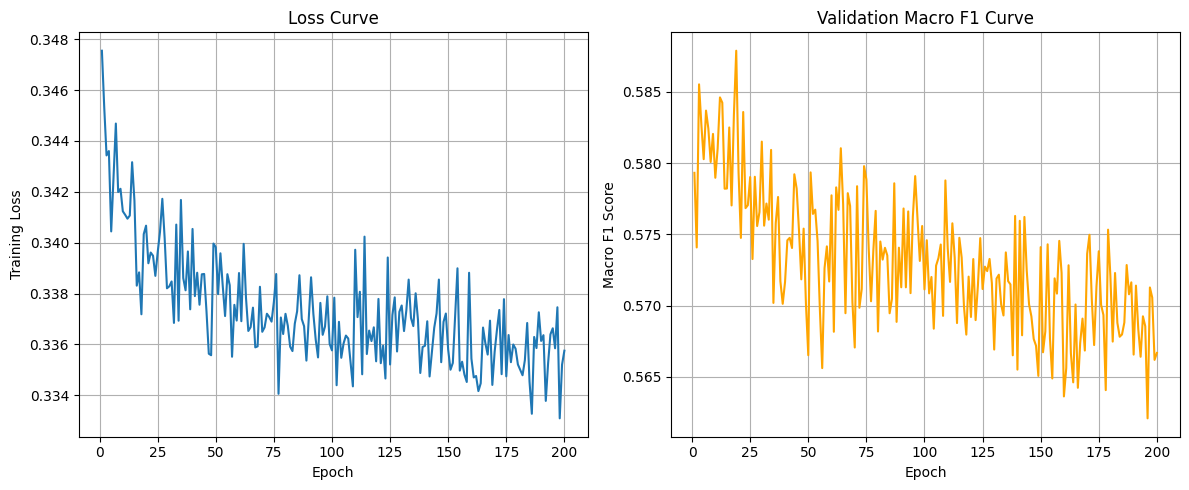

In [ ]:
num_epochs = 200
losses = []
macro_f1s = []

for epoch in tqdm(range(num_epochs), desc="Training Epochs"):
    model.train()
    epoch_loss = 0.0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * xb.size(0)

    avg_loss = epoch_loss / len(train_loader.dataset)
    losses.append(avg_loss)

    # === 每個 epoch 評估一次 Macro F1 ===
    model.eval()
    with torch.no_grad():
        y_proba = model(X_val_tensor).cpu().numpy().flatten()
        y_pred = (y_proba >= 0.3).astype(int)
        f1 = f1_score(y_val.flatten(), y_pred, average='macro')
        macro_f1s.append(f1)

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f} | Macro F1: {f1:.4f}")



plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(losses)+1), losses, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Loss Curve")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(macro_f1s)+1), macro_f1s, label="Macro F1", color='orange')
plt.xlabel("Epoch")
plt.ylabel("Macro F1 Score")
plt.title("Validation Macro F1 Curve")
plt.grid(True)

plt.tight_layout()
plt.show()
